In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math
tf.__version__

'2.0.0'

In [ ]:
#https://github.com/GokuMohandas/oreilly-pytorch/blob/master/code/lesson1/lesson1.ipynb

## Data Creation

In [2]:
seed=12345
random.seed(seed)
tf.random.set_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

In [20]:
# can convert this to numpy
# X = np.zeros(shape= (N * C, D))
# y = np.zeros(shape = N * C)
X, y = [], []

for i in range(C):
    index = 0
    r = np.linspace(0., 1., N)
    t = np.linspace(
        i * 2 * math.pi / C,
        (i + 2) * 2 * math.pi / C,
        N
    ) + np.random.normal(size=t.shape) * 0.1
    for ix in range(N * i, N * (i + 1)):
        X.append(r[index] * np.array([math.sin(t[index]), math.cos(t[index])]))
        y.append(i)
        index += 1

X = tf.stack(X)
y = tf.stack(y)
print("SHAPES:")
print("-------------------")
print("X:", tuple(X.shape))
print("y:", tuple(y.shape))

SHAPES:
-------------------
X: (3000, 2)
y: (3000,)


In [21]:
def plot_data(X, y, d=.0, auto=False):
    """
    Plot the data.
    """
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    if auto is True: plt.axis('equal')

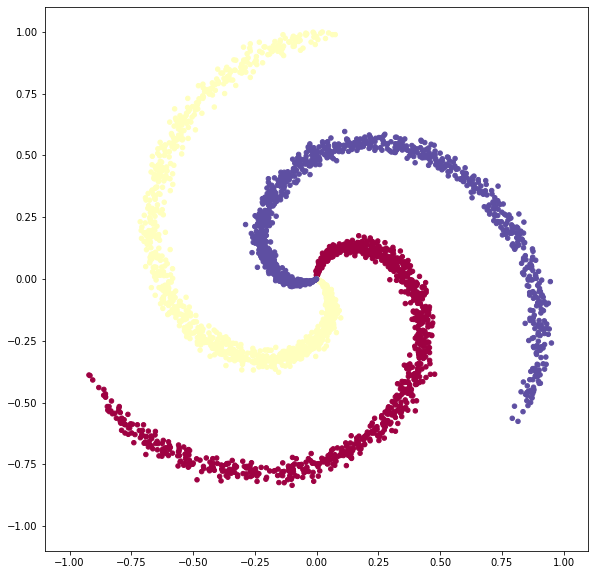

In [22]:
# Create the data
plt.figure(figsize=(14, 10))
plot_data(X.numpy(), y.numpy())

In [23]:
def plot_model(X, y, model, e=.0, auto=False):
    X = X.numpy()
    y = y.numpy()
    w1 = model.layers[0].get_weights()[0]
    b1 = model.layers[0].get_weights()[1]
    w2 = model.layers[1].get_weights()[0]
    b2 = model.layers[1].get_weights()[1]
    
    h = 0.01

    x_min, x_max = (-1.1, 1.1)
    y_min, y_max = (-1.1, 1.1)
    
    if auto is True:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], w1) + b1), w2) + b2
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    plt.axis('square')
    if auto is True:
        plt.axis((xx.min(), xx.max(), yy.min(), yy.max()))

## Linear model

In [32]:
class LinearModel(tf.keras.Model):
    
    def __init__(self, D_in, H, D_out):
        super(LinearModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(H, input_shape = D_in, activation='linear')
        self.dense2 = tf.keras.layers.Dense(D_out, activation='linear')

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

In [33]:
model = LinearModel((3000,2), H, C)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

model.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())
model.fit(X, y, epochs=1000)

Train on 3000 samples
Epoch 1/1000
3000/3000 [==============================] - 0s 76us/sample - loss: 1.5020
Epoch 2/1000
3000/3000 [==============================] - 0s 26us/sample - loss: 1.2537
Epoch 3/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 1.0664
Epoch 4/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.9252
Epoch 5/1000
3000/3000 [==============================] - 0s 26us/sample - loss: 0.8192
Epoch 6/1000
3000/3000 [==============================] - 0s 27us/sample - loss: 0.7405
Epoch 7/1000
3000/3000 [==============================] - 0s 26us/sample - loss: 0.6828
Epoch 8/1000
3000/3000 [==============================] - 0s 25us/sample - loss: 0.6405
Epoch 9/1000
3000/3000 [==============================] - 0s 26us/sample - loss: 0.6099
Epoch 10/1000
3000/3000 [==============================] - 0s 26us/sample - loss: 0.5876
Epoch 11/1000
3000/3000 [==============================] - 0s 25us/sample - loss: 0.5713
Epoch 12

3000/3000 [==============================] - 0s 25us/sample - loss: 0.4879
Epoch 93/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4879
Epoch 94/1000
3000/3000 [==============================] - 0s 25us/sample - loss: 0.4879
Epoch 95/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4879
Epoch 96/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4879
Epoch 97/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 98/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4879
Epoch 99/1000
3000/3000 [==============================] - 0s 23us/sample - loss: 0.4879
Epoch 100/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4879
Epoch 101/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4879
Epoch 102/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 103/1000
3000/3000 [======

3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 184/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 185/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 186/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 187/1000
3000/3000 [==============================] - 0s 25us/sample - loss: 0.4878
Epoch 188/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 189/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 190/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 191/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 192/1000
3000/3000 [==============================] - 0s 25us/sample - loss: 0.4878
Epoch 193/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 194/1000
3000/3000 

3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 275/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 276/1000
3000/3000 [==============================] - 0s 23us/sample - loss: 0.4878
Epoch 277/1000
3000/3000 [==============================] - 0s 23us/sample - loss: 0.4879
Epoch 278/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 279/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4879
Epoch 280/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 281/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 282/1000
3000/3000 [==============================] - 0s 23us/sample - loss: 0.4878
Epoch 283/1000
3000/3000 [==============================] - 0s 23us/sample - loss: 0.4878
Epoch 284/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 285/1000
3000/3000 

3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 366/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 367/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 368/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 369/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 370/1000
3000/3000 [==============================] - 0s 23us/sample - loss: 0.4878
Epoch 371/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4879
Epoch 372/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 373/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 374/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4879
Epoch 375/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 0.4878
Epoch 376/1000
3000/3000 

3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 457/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 458/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 459/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 460/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 461/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 462/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 463/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 0.4878
Epoch 464/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 0.4878
Epoch 465/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 466/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4879
Epoch 467/1000
3000/3000 

3000/3000 [==============================] - 0s 29us/sample - loss: 0.4878
Epoch 548/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 549/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 550/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 551/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 552/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 0.4878
Epoch 553/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 554/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 555/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 556/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 557/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 558/1000
3000/3000 

3000/3000 [==============================] - 0s 29us/sample - loss: 0.4878
Epoch 639/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 0.4878
Epoch 640/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 641/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 0.4878
Epoch 642/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 643/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 644/1000
3000/3000 [==============================] - 0s 30us/sample - loss: 0.4878
Epoch 645/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4879
Epoch 646/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 647/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 648/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 0.4878
Epoch 649/1000
3000/3000 

3000/3000 [==============================] - 0s 34us/sample - loss: 0.4878
Epoch 730/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 0.4878
Epoch 731/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 0.4878
Epoch 732/1000
3000/3000 [==============================] - 0s 30us/sample - loss: 0.4878
Epoch 733/1000
3000/3000 [==============================] - 0s 30us/sample - loss: 0.4878
Epoch 734/1000
3000/3000 [==============================] - 0s 30us/sample - loss: 0.4878
Epoch 735/1000
3000/3000 [==============================] - 0s 30us/sample - loss: 0.4878
Epoch 736/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 0.4878
Epoch 737/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 0.4878
Epoch 738/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 0.4878
Epoch 739/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 0.4878
Epoch 740/1000
3000/3000 

3000/3000 [==============================] - 0s 33us/sample - loss: 0.4878
Epoch 821/1000
3000/3000 [==============================] - 0s 33us/sample - loss: 0.4878
Epoch 822/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 0.4879
Epoch 823/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 0.4878
Epoch 824/1000
3000/3000 [==============================] - 0s 33us/sample - loss: 0.4878
Epoch 825/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 0.4878
Epoch 826/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 0.4879
Epoch 827/1000
3000/3000 [==============================] - 0s 30us/sample - loss: 0.4878
Epoch 828/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 0.4878
Epoch 829/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 0.4878
Epoch 830/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 0.4878
Epoch 831/1000
3000/3000 

3000/3000 [==============================] - 0s 32us/sample - loss: 0.4878
Epoch 912/1000
3000/3000 [==============================] - 0s 30us/sample - loss: 0.4878
Epoch 913/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 0.4878
Epoch 914/1000
3000/3000 [==============================] - 0s 35us/sample - loss: 0.4878
Epoch 915/1000
3000/3000 [==============================] - 0s 36us/sample - loss: 0.4878
Epoch 916/1000
3000/3000 [==============================] - 0s 36us/sample - loss: 0.4878
Epoch 917/1000
3000/3000 [==============================] - 0s 33us/sample - loss: 0.4878
Epoch 918/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 0.4878
Epoch 919/1000
3000/3000 [==============================] - 0s 30us/sample - loss: 0.4878
Epoch 920/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 0.4878
Epoch 921/1000
3000/3000 [==============================] - 0s 36us/sample - loss: 0.4878
Epoch 922/1000
3000/3000 

In [34]:
model.summary()

Model: "linear_model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  300       
_________________________________________________________________
dense_5 (Dense)              multiple                  303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


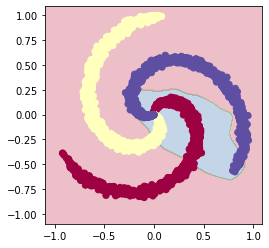

In [35]:
# Plot trained model
plot_model(X, y, model)

## Two-layer model

In [36]:
class TwoLayerModel(tf.keras.Model):
    
    def __init__(self, D_in, H, D_out):
        super(TwoLayerModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(H, input_shape = D_in, activation='relu')
        self.dense2 = tf.keras.layers.Dense(D_out)

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

In [37]:
two_layer_model = TwoLayerModel((3000,2), H, C)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

two_layer_model.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
two_layer_model.fit(X, y, epochs=1000)

Train on 3000 samples
Epoch 1/1000
3000/3000 [==============================] - 0s 104us/sample - loss: 5.3802
Epoch 2/1000
3000/3000 [==============================] - 0s 27us/sample - loss: 4.0560
Epoch 3/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 4.2953
Epoch 4/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.9743
Epoch 5/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 4.7653
Epoch 6/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.7904
Epoch 7/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.8893
Epoch 8/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.6470
Epoch 9/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.8393
Epoch 10/1000
3000/3000 [==============================] - 0s 37us/sample - loss: 3.7176
Epoch 11/1000
3000/3000 [==============================] - 0s 40us/sample - loss: 3.9785
Epoch 1

3000/3000 [==============================] - 0s 29us/sample - loss: 3.3289
Epoch 93/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 3.3148
Epoch 94/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 3.2999
Epoch 95/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 3.2981
Epoch 96/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2974
Epoch 97/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 3.2971
Epoch 98/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 3.2970
Epoch 99/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2968
Epoch 100/1000
3000/3000 [==============================] - 0s 37us/sample - loss: 3.2967
Epoch 101/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.2966
Epoch 102/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2965
Epoch 103/1000
3000/3000 [======

3000/3000 [==============================] - 0s 35us/sample - loss: 3.3507
Epoch 184/1000
3000/3000 [==============================] - 0s 35us/sample - loss: 3.2983
Epoch 185/1000
3000/3000 [==============================] - 0s 33us/sample - loss: 3.2973
Epoch 186/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2972
Epoch 187/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2971
Epoch 188/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 3.2970
Epoch 189/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2969
Epoch 190/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2969
Epoch 191/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2969
Epoch 192/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2968
Epoch 193/1000
3000/3000 [==============================] - 0s 34us/sample - loss: 3.2968
Epoch 194/1000
3000/3000 

3000/3000 [==============================] - 0s 25us/sample - loss: 3.9467
Epoch 275/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 3.8021
Epoch 276/1000
3000/3000 [==============================] - 0s 25us/sample - loss: 3.6858
Epoch 277/1000
3000/3000 [==============================] - 0s 24us/sample - loss: 3.8022
Epoch 278/1000
3000/3000 [==============================] - 0s 25us/sample - loss: 4.2025
Epoch 279/1000
3000/3000 [==============================] - 0s 25us/sample - loss: 5.2934
Epoch 280/1000
3000/3000 [==============================] - 0s 28us/sample - loss: 4.2499
Epoch 281/1000
3000/3000 [==============================] - 0s 26us/sample - loss: 4.1794
Epoch 282/1000
3000/3000 [==============================] - 0s 35us/sample - loss: 3.9495
Epoch 283/1000
3000/3000 [==============================] - 0s 34us/sample - loss: 3.7753
Epoch 284/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.6888
Epoch 285/1000
3000/3000 

3000/3000 [==============================] - 0s 25us/sample - loss: 3.3855
Epoch 366/1000
3000/3000 [==============================] - 0s 35us/sample - loss: 3.3598
Epoch 367/1000
3000/3000 [==============================] - 0s 33us/sample - loss: 3.3533
Epoch 368/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.3421
Epoch 369/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.3342
Epoch 370/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.3141
Epoch 371/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2980
Epoch 372/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2973
Epoch 373/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2971
Epoch 374/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.3115
Epoch 375/1000
3000/3000 [==============================] - 0s 30us/sample - loss: 3.4146
Epoch 376/1000
3000/3000 

3000/3000 [==============================] - 0s 36us/sample - loss: 3.7742
Epoch 457/1000
3000/3000 [==============================] - 0s 35us/sample - loss: 3.3334
Epoch 458/1000
3000/3000 [==============================] - 0s 39us/sample - loss: 3.4057
Epoch 459/1000
3000/3000 [==============================] - 0s 41us/sample - loss: 3.4406
Epoch 460/1000
3000/3000 [==============================] - 0s 42us/sample - loss: 3.4187
Epoch 461/1000
3000/3000 [==============================] - 0s 38us/sample - loss: 3.3643
Epoch 462/1000
3000/3000 [==============================] - 0s 35us/sample - loss: 3.4198
Epoch 463/1000
3000/3000 [==============================] - 0s 35us/sample - loss: 3.3744
Epoch 464/1000
3000/3000 [==============================] - 0s 37us/sample - loss: 3.3374
Epoch 465/1000
3000/3000 [==============================] - 0s 33us/sample - loss: 3.3414
Epoch 466/1000
3000/3000 [==============================] - 0s 37us/sample - loss: 3.3093
Epoch 467/1000
3000/3000 

3000/3000 [==============================] - 0s 33us/sample - loss: 3.3004
Epoch 548/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.4042
Epoch 549/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.3463
Epoch 550/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.3731
Epoch 551/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.3385
Epoch 552/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.3067
Epoch 553/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.2966
Epoch 554/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.3204
Epoch 555/1000
3000/3000 [==============================] - 0s 33us/sample - loss: 3.4889
Epoch 556/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.3305
Epoch 557/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.3537
Epoch 558/1000
3000/3000 

3000/3000 [==============================] - 0s 37us/sample - loss: 3.2959
Epoch 639/1000
3000/3000 [==============================] - 0s 34us/sample - loss: 3.2959
Epoch 640/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 641/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 642/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 643/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 644/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 645/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 646/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 647/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.2959
Epoch 648/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 649/1000
3000/3000 

3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 730/1000
3000/3000 [==============================] - 0s 33us/sample - loss: 3.2959
Epoch 731/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 732/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.2959
Epoch 733/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 734/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.2959
Epoch 735/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 736/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 737/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 738/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 739/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 740/1000
3000/3000 

3000/3000 [==============================] - 0s 31us/sample - loss: 3.2959
Epoch 821/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 822/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2959
Epoch 823/1000
3000/3000 [==============================] - 0s 29us/sample - loss: 3.2959
Epoch 824/1000
3000/3000 [==============================] - 0s 30us/sample - loss: 3.2959
Epoch 825/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.2959
Epoch 826/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.2959
Epoch 827/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.2959
Epoch 828/1000
3000/3000 [==============================] - 0s 30us/sample - loss: 3.2959
Epoch 829/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.2959
Epoch 830/1000
3000/3000 [==============================] - 0s 30us/sample - loss: 3.2959
Epoch 831/1000
3000/3000 

3000/3000 [==============================] - 0s 32us/sample - loss: 3.2958
Epoch 912/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2958
Epoch 913/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2958
Epoch 914/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.2958
Epoch 915/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2958
Epoch 916/1000
3000/3000 [==============================] - 0s 31us/sample - loss: 3.2958
Epoch 917/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2958
Epoch 918/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2958
Epoch 919/1000
3000/3000 [==============================] - 0s 32us/sample - loss: 3.2958
Epoch 920/1000
3000/3000 [==============================] - 0s 33us/sample - loss: 3.2958
Epoch 921/1000
3000/3000 [==============================] - 0s 27us/sample - loss: 3.2958
Epoch 922/1000
3000/3000 

In [38]:
two_layer_model.summary()

Model: "two_layer_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  300       
_________________________________________________________________
dense_7 (Dense)              multiple                  303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


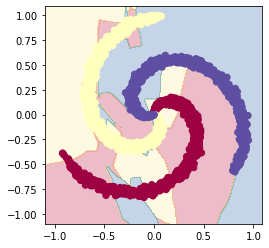

In [39]:
# Plot trained model
plot_model(X, y, two_layer_model)

## Proper Training

In [40]:
split_ratio = 0.8 # train-test split
num_epochs = 100
batch_size = 64
log_every = 25

In [58]:
training_mask = random.sample(range(X.shape[0]), int(X.shape[0] * split_ratio))
test_mask = [i for i in range(X.shape[0]) if not i in training_mask]
len(training_mask), len(test_mask)

(2400, 600)

In [57]:
set(test_mask).intersection(set(training_mask))

set()

In [69]:
X_train = tf.convert_to_tensor(X.numpy()[training_mask,:])
X_test = tf.convert_to_tensor(X.numpy()[test_mask,:])
y_train = tf.convert_to_tensor(y.numpy()[training_mask])
y_test = tf.convert_to_tensor(y.numpy()[test_mask])

In [70]:
learning_rate = 1e-3
lambda_l2 = 1e-5
dropout_p = 0.1
decay_rate = 0.9999
max_grad_norm = 5.0

In [74]:
class MultiLayerModel(tf.keras.Model):
    
    def __init__(self, D_in, H, D_out):
        super(MultiLayerModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(H, input_shape = D_in, activation='relu')
        self.dense2 = tf.keras.layers.Dense(D_out, activation='softmax')
        self.dropout = tf.keras.layers.Dropout(0.1)
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dropout(x)
        return self.dense2(x)

In [75]:
multi_layer_model = MultiLayerModel(X_train.shape, H, C)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

multi_layer_model.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy())
multi_layer_model.fit(X_train, y_train, epochs=1000)

Train on 2400 samples
Epoch 1/1000
2400/2400 [==============================] - 0s 106us/sample - loss: 3.3047
Epoch 2/1000
2400/2400 [==============================] - 0s 26us/sample - loss: 3.3334
Epoch 3/1000
2400/2400 [==============================] - 0s 28us/sample - loss: 3.3704
Epoch 4/1000
2400/2400 [==============================] - 0s 28us/sample - loss: 3.3995
Epoch 5/1000
2400/2400 [==============================] - 0s 30us/sample - loss: 3.4209
Epoch 6/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 3.4578
Epoch 7/1000
2400/2400 [==============================] - 0s 30us/sample - loss: 3.4901
Epoch 8/1000
2400/2400 [==============================] - 0s 29us/sample - loss: 3.5354
Epoch 9/1000
2400/2400 [==============================] - 0s 30us/sample - loss: 3.5779
Epoch 10/1000
2400/2400 [==============================] - 0s 29us/sample - loss: 3.6482
Epoch 11/1000
2400/2400 [==============================] - 0s 29us/sample - loss: 3.6696
Epoch 1

2400/2400 [==============================] - 0s 29us/sample - loss: 10.0323
Epoch 93/1000
2400/2400 [==============================] - 0s 28us/sample - loss: 10.0367
Epoch 94/1000
2400/2400 [==============================] - 0s 27us/sample - loss: 10.4093
Epoch 95/1000
2400/2400 [==============================] - 0s 27us/sample - loss: 10.5648
Epoch 96/1000
2400/2400 [==============================] - 0s 29us/sample - loss: 10.3199
Epoch 97/1000
2400/2400 [==============================] - 0s 28us/sample - loss: 10.5590
Epoch 98/1000
2400/2400 [==============================] - 0s 28us/sample - loss: 10.5968
Epoch 99/1000
2400/2400 [==============================] - 0s 28us/sample - loss: 10.8841
Epoch 100/1000
2400/2400 [==============================] - 0s 29us/sample - loss: 10.8489
Epoch 101/1000
2400/2400 [==============================] - 0s 28us/sample - loss: 10.7413
Epoch 102/1000
2400/2400 [==============================] - 0s 30us/sample - loss: 10.9788
Epoch 103/1000
2400/2

2400/2400 [==============================] - 0s 34us/sample - loss: 16.6259
Epoch 183/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 16.8289
Epoch 184/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 16.6109
Epoch 185/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 16.4134
Epoch 186/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 16.9604
Epoch 187/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 16.9472
Epoch 188/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 17.1284
Epoch 189/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 16.9063
Epoch 190/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 17.4657
Epoch 191/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 17.4039
Epoch 192/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 17.2932
Epoch 193/1000

2400/2400 [==============================] - 0s 34us/sample - loss: 22.3236
Epoch 273/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 21.8771
Epoch 274/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 22.3069
Epoch 275/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 22.4685
Epoch 276/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 22.7329
Epoch 277/1000
2400/2400 [==============================] - 0s 35us/sample - loss: 22.8416
Epoch 278/1000
2400/2400 [==============================] - 0s 39us/sample - loss: 22.6529
Epoch 279/1000
2400/2400 [==============================] - 0s 39us/sample - loss: 21.7768
Epoch 280/1000
2400/2400 [==============================] - 0s 36us/sample - loss: 22.3265
Epoch 281/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 22.9127
Epoch 282/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 23.0834
Epoch 283/1000

2400/2400 [==============================] - 0s 34us/sample - loss: 26.0715
Epoch 363/1000
2400/2400 [==============================] - 0s 36us/sample - loss: 26.0704
Epoch 364/1000
2400/2400 [==============================] - 0s 35us/sample - loss: 26.0009
Epoch 365/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 26.7693
Epoch 366/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 26.3616
Epoch 367/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 27.4571
Epoch 368/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 26.1286
Epoch 369/1000
2400/2400 [==============================] - 0s 30us/sample - loss: 27.9236
Epoch 370/1000
2400/2400 [==============================] - 0s 34us/sample - loss: 27.5594
Epoch 371/1000
2400/2400 [==============================] - 0s 38us/sample - loss: 26.1103
Epoch 372/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 27.3290
Epoch 373/1000

2400/2400 [==============================] - 0s 30us/sample - loss: 29.9365
Epoch 453/1000
2400/2400 [==============================] - 0s 30us/sample - loss: 30.3906
Epoch 454/1000
2400/2400 [==============================] - 0s 30us/sample - loss: 30.7933
Epoch 455/1000
2400/2400 [==============================] - 0s 30us/sample - loss: 29.6836
Epoch 456/1000
2400/2400 [==============================] - 0s 29us/sample - loss: 30.3791
Epoch 457/1000
2400/2400 [==============================] - 0s 30us/sample - loss: 30.6700
Epoch 458/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 31.0097
Epoch 459/1000
2400/2400 [==============================] - 0s 30us/sample - loss: 31.5100
Epoch 460/1000
2400/2400 [==============================] - 0s 30us/sample - loss: 30.2454
Epoch 461/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 30.9139
Epoch 462/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 31.2470
Epoch 463/1000

2400/2400 [==============================] - 0s 46us/sample - loss: 32.4346
Epoch 543/1000
2400/2400 [==============================] - 0s 39us/sample - loss: 33.0077
Epoch 544/1000
2400/2400 [==============================] - 0s 46us/sample - loss: 32.8084
Epoch 545/1000
2400/2400 [==============================] - 0s 52us/sample - loss: 32.8809
Epoch 546/1000
2400/2400 [==============================] - 0s 49us/sample - loss: 32.9138
Epoch 547/1000
2400/2400 [==============================] - 0s 47us/sample - loss: 34.5627
Epoch 548/1000
2400/2400 [==============================] - 0s 38us/sample - loss: 31.9002
Epoch 549/1000
2400/2400 [==============================] - 0s 39us/sample - loss: 33.5636
Epoch 550/1000
2400/2400 [==============================] - 0s 48us/sample - loss: 33.2438
Epoch 551/1000
2400/2400 [==============================] - 0s 50us/sample - loss: 33.3514
Epoch 552/1000
2400/2400 [==============================] - 0s 48us/sample - loss: 32.8002
Epoch 553/1000

2400/2400 [==============================] - 0s 37us/sample - loss: 34.0113
Epoch 633/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 34.5774
Epoch 634/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 34.1250
Epoch 635/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 34.5139
Epoch 636/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 35.1558
Epoch 637/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 34.0917
Epoch 638/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 35.1815
Epoch 639/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 34.9729
Epoch 640/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 35.1753
Epoch 641/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 34.0454
Epoch 642/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 35.4639
Epoch 643/1000

2400/2400 [==============================] - 0s 33us/sample - loss: 35.8354
Epoch 723/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 35.8004
Epoch 724/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 36.1663
Epoch 725/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 36.3350
Epoch 726/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 36.7979
Epoch 727/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 35.1076
Epoch 728/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 35.9007
Epoch 729/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 35.2703
Epoch 730/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 35.7024
Epoch 731/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 36.4306
Epoch 732/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 36.5420
Epoch 733/1000

2400/2400 [==============================] - 0s 31us/sample - loss: 36.6107
Epoch 813/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 36.4751
Epoch 814/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 36.8442
Epoch 815/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 35.9524
Epoch 816/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 36.2414
Epoch 817/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 35.4004
Epoch 818/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 36.3508
Epoch 819/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 37.2762
Epoch 820/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 37.2513
Epoch 821/1000
2400/2400 [==============================] - 0s 30us/sample - loss: 35.7736
Epoch 822/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 36.1117
Epoch 823/1000

2400/2400 [==============================] - 0s 36us/sample - loss: 36.4781
Epoch 903/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 36.2574
Epoch 904/1000
2400/2400 [==============================] - 0s 34us/sample - loss: 35.8017
Epoch 905/1000
2400/2400 [==============================] - 0s 36us/sample - loss: 36.2625
Epoch 906/1000
2400/2400 [==============================] - 0s 36us/sample - loss: 35.5726
Epoch 907/1000
2400/2400 [==============================] - 0s 37us/sample - loss: 35.8618
Epoch 908/1000
2400/2400 [==============================] - 0s 37us/sample - loss: 35.3490
Epoch 909/1000
2400/2400 [==============================] - 0s 33us/sample - loss: 36.1443
Epoch 910/1000
2400/2400 [==============================] - 0s 35us/sample - loss: 35.4930
Epoch 911/1000
2400/2400 [==============================] - 0s 37us/sample - loss: 35.9830
Epoch 912/1000
2400/2400 [==============================] - 0s 36us/sample - loss: 36.8121
Epoch 913/1000

2400/2400 [==============================] - 0s 33us/sample - loss: 34.8346
Epoch 993/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 33.4996
Epoch 994/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 34.9688
Epoch 995/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 33.8291
Epoch 996/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 34.8320
Epoch 997/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 34.6488
Epoch 998/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 33.8713
Epoch 999/1000
2400/2400 [==============================] - 0s 32us/sample - loss: 33.6519
Epoch 1000/1000
2400/2400 [==============================] - 0s 31us/sample - loss: 35.6310


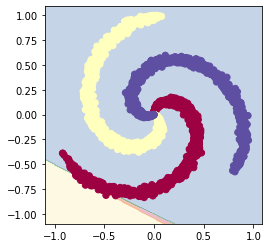

In [76]:
plot_model(X, y, multi_layer_model)